## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
PATIENCE = [10, 25]

In [13]:
# 載入 Callbacks
from keras.callbacks import EarlyStopping
"""Code Here
設定 callbacks: Earlystop
"""

results = {}
for patience in PATIENCE:
    keras.backend.clear_session()
    print("Experiment with Patience = %.3f"%(patience))
    
    earlystop = EarlyStopping(monitor="val_acc",
                                         patience=patience,
                                         verbose=1)
    
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train,
                 epochs=EPOCHS,
                 batch_size=BATCH_SIZE,
                 validation_data=(x_test, y_test),
                 shuffle=True,
                 callbacks=[earlystop])
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-patience-%s"%(patience)
    results[exp_name_tag] = {"train-loss" : train_loss,
                                         "valid-loss" : valid_loss,
                                         "train-acc" : train_acc,
                                         "valid-acc" : valid_acc}


Experiment with Patience = 10.000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)  

50000/50000 [==============================] - 5s 103us/step - loss: 0.8399 - acc: 0.7240 - val_loss: 1.4882 - val_acc: 0.4959oss: 0.8408 - acc: 0.
Epoch 32/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.8212 - acc: 0.7317 - val_loss: 1.4744 - val_acc: 0.4995
Epoch 33/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.8015 - acc: 0.7387 - val_loss: 1.4952 - val_acc: 0.4967
Epoch 34/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.7823 - acc: 0.7467 - val_loss: 1.5115 - val_acc: 0.4939
Epoch 35/50
50000/50000 [==============================] - 5s 95us/step - loss: 0.7637 - acc: 0.7539 - val_loss: 1.5208 - val_acc: 0.4984
Epoch 36/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.7453 - acc: 0.7610 - val_loss: 1.5129 - val_acc: 0.4987
Epoch 37/50
50000/50000 [==============================] - 5s 94us/step - loss: 0.7245 - acc: 0.7713 - val_loss: 1.5256 - val_acc: 0.4969
Epoch 38/50
50000/50000 

50000/50000 [==============================] - 5s 94us/step - loss: 0.6800 - acc: 0.7884 - val_loss: 1.5468 - val_acc: 0.4986
Epoch 40/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.6604 - acc: 0.7948 - val_loss: 1.5790 - val_acc: 0.4914
Epoch 41/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.6405 - acc: 0.8044 - val_loss: 1.5851 - val_acc: 0.4929
Epoch 42/50
50000/50000 [==============================] - 5s 94us/step - loss: 0.6246 - acc: 0.8108 - val_loss: 1.5972 - val_acc: 0.4927
Epoch 43/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.6041 - acc: 0.8181 - val_loss: 1.5978 - val_acc: 0.4916
Epoch 44/50
50000/50000 [==============================] - 5s 104us/step - loss: 0.5870 - acc: 0.8259 - val_loss: 1.6075 - val_acc: 0.4942
Epoch 45/50
50000/50000 [==============================] - 5s 109us/step - loss: 0.5721 - acc: 0.8313 - val_loss: 1.6281 - val_acc: 0.4945
Epoch 46/50
50000/50000 [===================

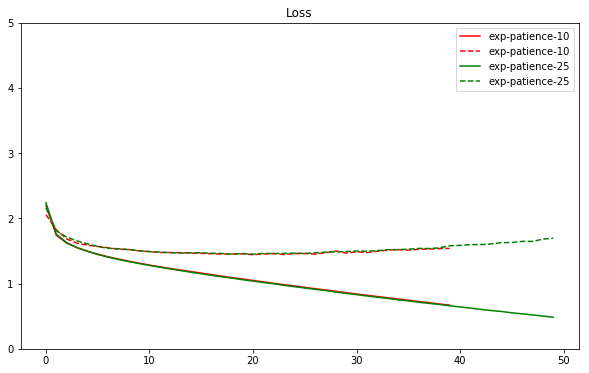

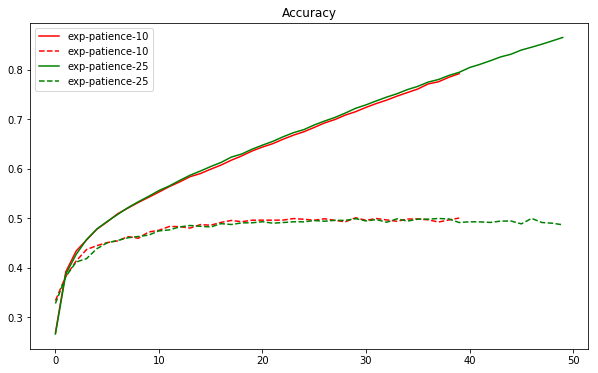

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(10, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-loss"])), results[cond]["train-loss"], "-", label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]["valid-loss"])), results[cond]["valid-loss"], "--", label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()


plt.figure(figsize=(10,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-acc"])), results[cond]["train-acc"], "-", label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]["valid-acc"])), results[cond]["valid-acc"], "--", label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()